# Part 7: Gravitational-wave Detectors

This tutorial will show how to access information about gravitational wave detectors and key information about how their orientation and position affects their view of a source

#### Acknowledgments: 
1) This tutorial was inspired by the Gravitational Wave Open Data Workshop 2018 organized by the LIGO Scientific Collaboration which was held on The California Institute of Technology (Caltech).

2) We will be using the PyCBC library [DOI: 10.5281/zenodo.1472015], which is a open library used to study GW strain data, find astrophysical sources generated by CBC, and study their parameters. Then, we will be using here some of the same tools that were used by the LIGO/Virgo scientific collaboration to find the GW events GW150914, GW151226, GW170104, GW170608, GW170814 and GW170817. 

3) Some reference papers are: *(i)* "The PyCBC search for gravitational waves from compact binary coalescence" arXiv:1508.02357; *(ii)* "PyCBC Inference: A Python-based parameter estimation toolkit for compact binary coalescence signals" arXiv:1807.10312.

4) This research has made use of data, software and/or web tools obtained from the Gravitational Wave Open Science Center (https://www.gw-openscience.org), a service of LIGO Laboratory, the LIGO Scientific Collaboration and the Virgo Collaboration. LIGO is funded by the U.S. National Science Foundation. Virgo is funded by the French Centre National de Recherche Scientifique (CNRS), the Italian Istituto Nazionale della Fisica Nucleare (INFN) and the Dutch Nikhef, with contributions by Polish and Hungarian institutes.

#### Aditional information:
1) For more information, please visit http://www.gravitationalwaves.mx

2) If you are interested in collaborations with us, please contact Dr. Claudia Moreno claudia.moreno@academico.udg.mx

3) We would like to thank the support of the National Council of Science and Technology of Mexico (CONACyT) through "Red Temática de Agujeros Negros y Ondas Gravitatorias" (http://www.redtematicaanyog.mx).

# Gravitational-wave Detectors

This tutorial will show how to access information about gravitational wave detectors and key information about how their orientation and position affects their view of a source.

## 7.1 Detector Locations

Here we'll show ...


In [2]:
from pycbc.detector import Detector, get_available_detectors

# We can list the available detectors. This gives their detector abbreviation
# along with a longer name. Note that some of these are not physical detectors
# but may be useful for testing or study purposes

for abv, long_name in get_available_detectors():
    d = Detector(abv)

    # Note that units are all in radians
    print("{} {} Latitude {} Longitude {}".format(long_name, abv,
                                                  d.latitude,
                                                  d.longitude))

GEO_600 G1 Latitude 0.91184982752 Longitude 0.17116780435
ALLEGRO_320 A1 Latitude 0.53079879206 Longitude -1.59137068496
LHO_4k H1 Latitude 0.81079526383 Longitude -2.08405676917
TAMA_300 T1 Latitude 0.62267336022 Longitude 2.43536359469
VIRGO V1 Latitude 0.76151183984 Longitude 0.18333805213
ET3_T1400308 E3 Latitude 0.76270463257 Longitude 0.1819299673
EXPLORER C1 Latitude 0.81070543755 Longitude 0.10821041362
CIT_40 P1 Latitude 0.59637900541 Longitude -2.06175744538
KAGRA K1 Latitude 0.6355068497 Longitude 2.396441015
ET2_T1400308 E2 Latitude 0.7629930799 Longitude 0.1840585887
ET0_T1400308 E0 Latitude 0.76270463257 Longitude 0.1819299673
LIO_4k I1 Latitude 0.248418530201 Longitude 1.33401332494
ET1_T1400308 E1 Latitude 0.76151183984 Longitude 0.18333805213
AURIGA O1 Latitude 0.79156499342 Longitude 0.20853775679
NIOBE B1 Latitude -0.5573418078 Longitude 2.02138216202
LHO_2k H2 Latitude 0.81079526383 Longitude -2.08405676917
LLO_4k L1 Latitude 0.53342313506 Longitude -1.58430937078
N

## 7.2 Light travel time between detectors
 
Here we'll show ...

In [3]:
from pycbc.detector import Detector

for ifo1 in ['H1', 'L1', 'V1']:
    for ifo2 in ['H1', 'L1', 'V1']:
        dt = Detector(ifo1).light_travel_time_to_detector(Detector(ifo2))
        print("Direct Time from {} to {} is {} seconds".format(ifo1, ifo2, dt))

Direct Time from H1 to H1 is 0.0 seconds
Direct Time from H1 to L1 is 0.0100128461522 seconds
Direct Time from H1 to V1 is 0.0272879799338 seconds
Direct Time from L1 to H1 is 0.0100128461522 seconds
Direct Time from L1 to L1 is 0.0 seconds
Direct Time from L1 to V1 is 0.0264483410167 seconds
Direct Time from V1 to H1 is 0.0272879799338 seconds
Direct Time from V1 to L1 is 0.0264483410167 seconds
Direct Time from V1 to V1 is 0.0 seconds


## 7.3 Time source gravitational-wave passes through detector

Here we'll show ...

In [5]:
from pycbc.detector import Detector
from astropy.utils import iers

# Make sure the documentation can be built without an internet connection
iers.conf.auto_download = False

# The source of the gravitational waves
right_ascension = 0.7
declination = -0.5

# Reference location will be the Hanford detector
# see the `time_delay_from_earth_center` method to use use geocentric time
# as the reference
dref = Detector("H1")

# Time in GPS seconds that the GW passes
time = 100000000

# Time that the GW will (or has) passed through the given detector
for ifo in ["H1", "L1", "V1"]:
    d = Detector(ifo)
    dt = d.time_delay_from_detector(dref, right_ascension, declination, time)
    st = "GW passed through {} {} seconds relative to passing by Hanford"
    print(st.format(ifo, dt))

GW passed through H1 0.0 seconds relative to passing by Hanford
GW passed through L1 0.00243738795226 seconds relative to passing by Hanford
GW passed through V1 -0.0147543117405 seconds relative to passing by Hanford


## 7.4 Antenna Patterns and Projecting a Signal into the Detector Frame

Here we'll show ...

fp=-0.385346273135, fc=0.706066713694


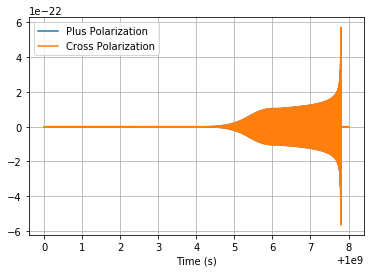

In [9]:
from pycbc.detector import Detector
from pycbc.waveform import get_td_waveform
import pylab

# Time, orientation and location of the source in the sky
ra = 1.7
dec = 1.7
pol = 0.2
inc = 0
time = 1000000000

# We can calcualate the antenna pattern for Hanford at
# the specific sky location
d = Detector("H1")

# We get back the fp and fc antenna pattern weights.
fp, fc = d.antenna_pattern(ra, dec, pol, time)
print("fp={}, fc={}".format(fp, fc))

# These factors allow us to project a signal into what the detector would
# observe

## Generate a waveform
hp, hc = get_td_waveform(approximant="IMRPhenomD", mass1=10, mass2=10,
                         f_lower=30, delta_t=1.0/4096, inclination=inc,
                         distance=400)

## Apply the factors to get the detector frame strain
ht = fp * hp + fc * hc


# The projection process can also take into account the rotation of the
# earth using the project wave function.
hp.start_time = hc.start_time = time
ht = d.project_wave(hp, hc, ra, dec, pol)


# Zoom in near the merger time#
pylab.plot(hp.sample_times, hp, label='Plus Polarization')
pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
#pylab.xlim(-.01, .01)
pylab.legend()
pylab.grid()
pylab.show()

## 7.5 Generating one waveform in multiple detectors

Here we'll show ...

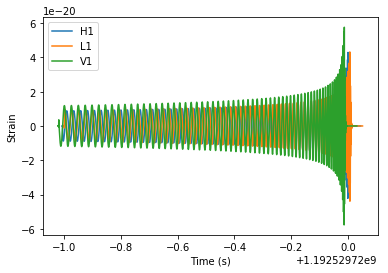

In [2]:
import pylab
from pycbc.waveform import get_td_waveform
from pycbc.detector import Detector

apx = 'SEOBNRv4'
# NOTE: Inclination runs from 0 to pi, with poles at 0 and pi
#       coa_phase runs from 0 to 2 pi.
hp, hc = get_td_waveform(approximant=apx,
                         mass1=10,
                         mass2=10,
                         spin1z=0.9,
                         spin2z=0.4,
                         inclination=1.23,
                         coa_phase=2.45,
                         delta_t=1.0/4096,
                         f_lower=40)

det_h1 = Detector('H1')
det_l1 = Detector('L1')
det_v1 = Detector('V1')

# Choose a GPS end time, sky location, and polarization phase for the merger
# NOTE: Right ascension and polarization phase runs from 0 to 2pi
#       Declination runs from pi/2. to -pi/2 with the poles at pi/2. and -pi/2.
end_time = 1192529720
declination = 0.65
right_ascension = 4.67
polarization = 2.34
hp.start_time += end_time
hc.start_time += end_time

signal_h1 = det_h1.project_wave(hp, hc,  right_ascension, declination, polarization)
signal_l1 = det_l1.project_wave(hp, hc,  right_ascension, declination, polarization)
signal_v1 = det_v1.project_wave(hp, hc,  right_ascension, declination, polarization)

pylab.plot(signal_h1.sample_times, signal_h1, label='H1')
pylab.plot(signal_l1.sample_times, signal_l1, label='L1')
pylab.plot(signal_v1.sample_times, signal_v1, label='V1')

pylab.ylabel('Strain')
pylab.xlabel('Time (s)')
pylab.legend()
pylab.show()